In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
countryData = pd.read_csv('/content/250 Country Data.csv', index_col=0)
countryData.head()

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1%.,79%,3.9%.,10.3%.
4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3%.,97% (1980 est.),NaN,NaN


In [16]:
countryData['Real Growth Rating(%)'] = countryData['Real Growth Rating(%)'].str.extract('(\S+)%')[0].str.replace('–', '-').astype(float)
countryData['Literacy Rate(%)'] = countryData['Literacy Rate(%)'].str.extract('(\S+)%')[0].str.replace('–', '-').astype(float)
countryData['Inflation(%)'] = countryData['Inflation(%)'].str.extract('(\S+)%')[0].str.replace('–', '-').astype(float)
countryData['Unemployement(%)'] = countryData['Unemployement(%)'].str.extract('(\d+\.?\d*)\D*%')[0].str.replace('–', '-').astype(float)
countryData.head()

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1,28.1,6.8,35.0
1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.7,98.7,1.7,16.9
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1,79.0,3.9,10.3
4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3.0,97.0,NaN,NaN


In [17]:
countryData.isna().sum()

name                       0
region                     2
subregion                  3
population                 0
area                      10
gini                      97
Real Growth Rating(%)     85
Literacy Rate(%)          77
Inflation(%)              87
Unemployement(%)         101
dtype: int64

In [18]:
countryData[countryData['subregion'].isna()]

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
8,Antarctica,Polar,NaN,1000,14000000.0,NaN,NaN,NaN,NaN,NaN
30,Bouvet Island,NaN,NaN,0,49.0,NaN,NaN,NaN,NaN,NaN
98,Heard Island and McDonald Islands,NaN,NaN,0,412.0,NaN,NaN,NaN,NaN,NaN


The columns are mostly NaNs to we can simply drop them

In [19]:
countryData = countryData.drop(countryData[countryData['subregion'].isna()].index)

In [20]:
print(countryData.shape)
countryData.isna().sum()

(247, 10)


name                      0
region                    0
subregion                 0
population                0
area                     10
gini                     94
Real Growth Rating(%)    82
Literacy Rate(%)         74
Inflation(%)             84
Unemployement(%)         98
dtype: int64

NaN areas can be simply obtained from Google to avoid losing information.

In [21]:
indicies = countryData[countryData['area'].isna()]['area'].index 
countryData.loc[indicies, 'area'] = [34.2, 83534, 1628, 1128, 374, 6220, 2512, 420, 3903, 61399]
countryData.loc[indicies]

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
33,United States Minor Outlying Islands,Americas,Northern America,300,34.2,NaN,NaN,NaN,NaN,NaN
78,French Guiana,Americas,South America,254541,83534.0,NaN,NaN,NaN,NaN,NaN
90,Guadeloupe,Americas,Caribbean,400132,1628.0,NaN,NaN,98.0,NaN,27.8
140,Martinique,Americas,Caribbean,378243,1128.0,NaN,NaN,97.7,3.9,27.2
143,Mayotte,Africa,Eastern Africa,226915,374.0,NaN,NaN,NaN,NaN,38.0
171,"Palestine, State of",Asia,Western Asia,4682467,6220.0,35.5,NaN,NaN,NaN,NaN
183,Réunion,Africa,Eastern Africa,840974,2512.0,NaN,2.5,89.0,NaN,36.0
188,"Saint Helena, Ascension and Tristan da Cunha",Africa,Western Africa,4255,420.0,NaN,NaN,NaN,NaN,NaN
209,South Georgia and the South Sandwich Islands,Americas,South America,30,3903.0,NaN,NaN,NaN,NaN,NaN
216,Svalbard and Jan Mayen,Europe,Northern Europe,2562,61399.0,NaN,NaN,NaN,NaN,NaN


The rest of the missing data is replaced with the mean for each column as it is more than 3% of the data and cannot be dropped or obtained.

In [22]:
regionGroups = countryData.groupby(['region'])[['gini','Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)', 'Unemployement(%)']].mean()
regionGroups

,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
region,,,,,
Africa,44.580435,4.206818,64.979792,6.636585,28.062069
Americas,48.703704,4.257812,91.977778,4.181818,11.179412
Asia,37.020513,5.163514,85.755263,5.270270,11.210811
Europe,31.816216,0.434211,98.172973,1.897297,10.202703
Oceania,40.100000,1.964286,92.564286,2.613333,17.885833


In [23]:
for i in countryData['region'].unique():
  countryData.loc[(countryData['region']==i) & (countryData['gini'].isna()),'gini'] = regionGroups[regionGroups.index == i]['gini'].values[0]
  countryData.loc[(countryData['region']==i) & (countryData['Real Growth Rating(%)'].isna()),'Real Growth Rating(%)'] = regionGroups[regionGroups.index == i]['Real Growth Rating(%)'].values[0]
  countryData.loc[(countryData['region']==i) & (countryData['Literacy Rate(%)'].isna()),'Literacy Rate(%)'] = regionGroups[regionGroups.index == i]['Literacy Rate(%)'].values[0]
  countryData.loc[(countryData['region']==i) & (countryData['Inflation(%)'].isna()),'Inflation(%)'] = regionGroups[regionGroups.index == i]['Inflation(%)'].values[0]
  countryData.loc[(countryData['region']==i) & (countryData['Unemployement(%)'].isna()),'Unemployement(%)'] = regionGroups[regionGroups.index == i]['Unemployement(%)'].values[0]

In [24]:
countryData.isna().sum()

name                     0
region                   0
subregion                0
population               0
area                     0
gini                     0
Real Growth Rating(%)    0
Literacy Rate(%)         0
Inflation(%)             0
Unemployement(%)         0
dtype: int64

##Feature Engineering

In [25]:
countryData['Population Density'] = countryData['population'] / countryData['area']
countryData['Literate Count'] = countryData['population'] * (countryData['Literacy Rate(%)']/100)
countryData['Illiterate Count'] = countryData['population'] - countryData['Literate Count']
countryData['Unemployment Count'] = countryData['population'] * (countryData['Unemployement(%)']/100)
countryData['Employment Count'] = countryData['population'] - countryData['Unemployment Count']
countryData['Literate Working Rate'] = countryData['Employment Count'] / countryData['Literate Count']
countryData.head()

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Population Density,Literate Count,Illiterate Count,Unemployment Count,Employment Count,Literate Working Rate
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,3.100000,28.100000,6.800000,35.000000,42.403976,7.771658e+06,1.988549e+07,9.680001e+06,1.797714e+07,2.313167
1,Åland Islands,Europe,Northern Europe,28875,1580.0,31.816216,0.434211,98.172973,1.897297,10.202703,18.275316,2.834745e+04,5.275541e+02,2.946030e+03,2.592897e+04,0.914685
2,Albania,Europe,Southern Europe,2886026,28748.0,34.500000,0.700000,98.700000,1.700000,16.900000,100.390497,2.848508e+06,3.751834e+04,4.877384e+05,2.398288e+06,0.841945
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.300000,3.100000,79.000000,3.900000,10.300000,16.962382,3.191600e+07,8.484000e+06,4.161200e+06,3.623880e+07,1.135443
4,American Samoa,Oceania,Polynesia,57100,199.0,40.100000,3.000000,97.000000,2.613333,17.885833,286.934673,5.538700e+04,1.713000e+03,1.021281e+04,4.688719e+04,0.846538


In [26]:
countryData.to_csv('250CountryDataGen.csv')

##Correlation Matrix
We can have an overview of which variables are correlated by using the correlation matrix

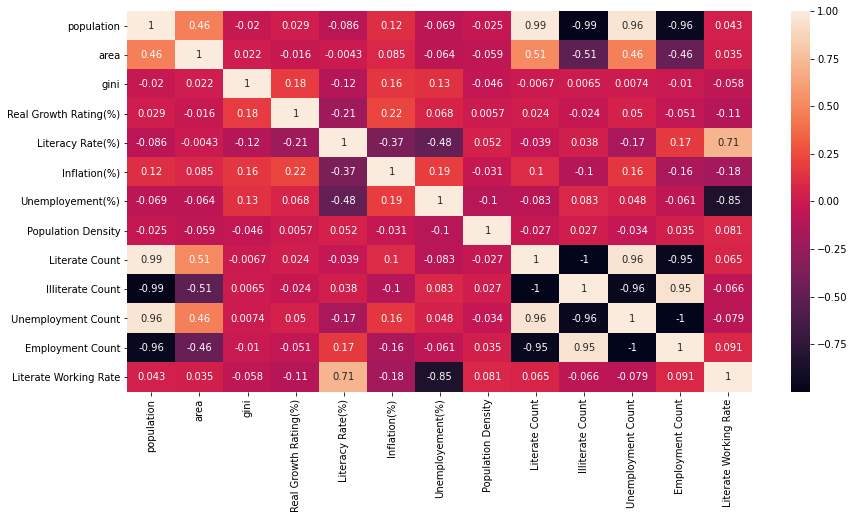

In [ ]:
import seaborn as sn
plt.figure(figsize=(14,7))
sn.heatmap(countryData.corr(), annot=True)

There is a strong correlation between area and population which is trivial.

There is also a clear negative Correlation between Literacy Rate and Unemployment Percentage


##Box Plot

(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

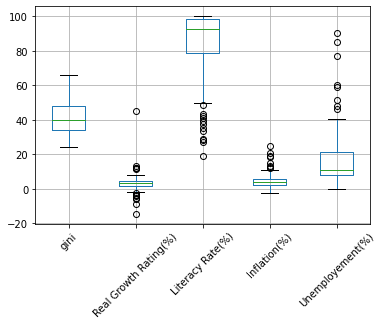

In [ ]:
countryData.boxplot(column=['gini','Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)','Unemployement(%)'])
plt.xticks(rotation=45)

##10 Least Literate Countries

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

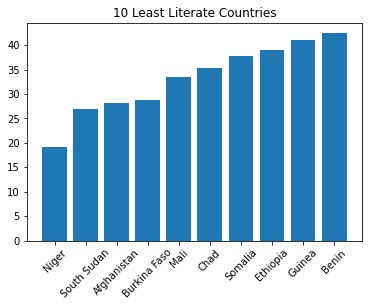

In [ ]:
literacyTop10 = countryData.sort_values('Literacy Rate(%)', ascending=True, ignore_index=True)[:10]
plt.title("10 Least Literate Countries")
plt.bar(literacyTop10['name'], literacyTop10['Literacy Rate(%)'])
plt.xticks(rotation=45)

##Employment Charts

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

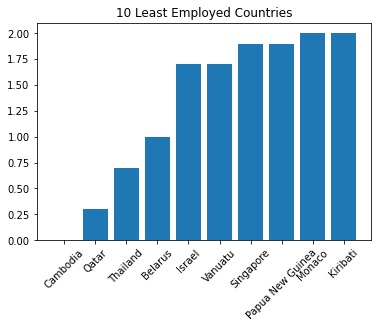

In [ ]:
unemploymentTop10 = countryData.sort_values('Unemployement(%)', ascending=True, ignore_index=True)[:10]
plt.title("10 Least Employed Countries")
plt.bar(unemploymentTop10['name'], unemploymentTop10['Unemployement(%)'])
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

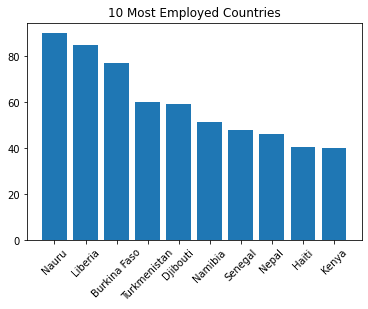

In [ ]:
employmentTop10 = countryData.sort_values('Unemployement(%)', ascending=False, ignore_index=True)[:10]
plt.title("10 Most Employed Countries")
plt.bar(employmentTop10['name'], employmentTop10['Unemployement(%)'])
plt.xticks(rotation=45)

##Literacy Rate vs Unemployement

According to the confusion matrix, there is a correlation between Literacy Rate and Unemployment, we plot them to see if there is something interesting.

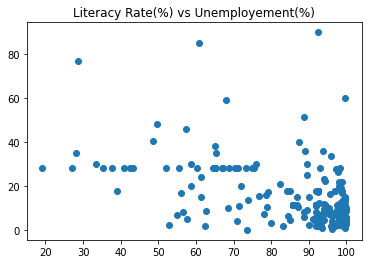

In [ ]:
plt.title("Literacy Rate(%) vs Unemployement(%)")
plt.scatter(countryData['Literacy Rate(%)'], countryData['Unemployement(%)'])

We can conclude that most countries with high literacy rate have a low unemployment rate, which is logical.